# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [7]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

x_train,y_train = get_three_classes(x_train,y_train)
x_test,y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

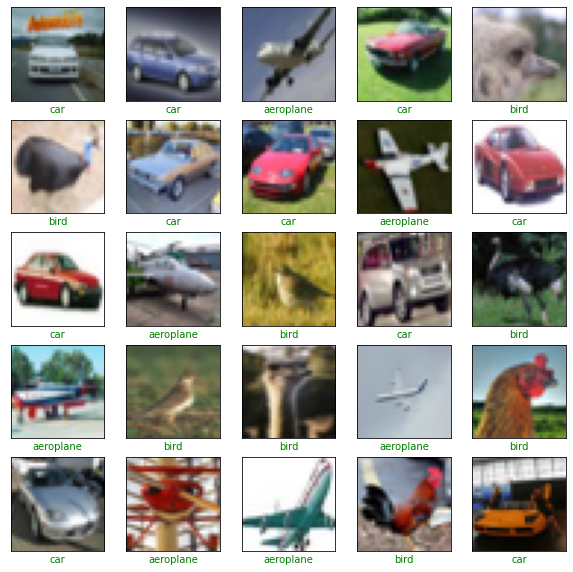

In [30]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 25, replace=False)

  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])

    col="green" if np.argmax(y[i]) == np.argmax(p[i]) else "r"
    plt.xlabel(class_names[np.argmax(p[i])], color=col)
    # plt.tight_layout()

  plt.show()

show_random_examples(x_train,y_train,y_train)

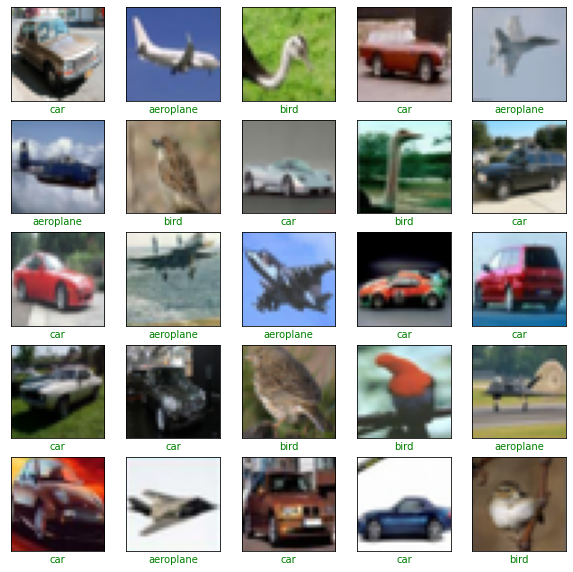

In [31]:
show_random_examples(x_test,y_test,y_test)


# Task 4: Create Model

In [80]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.models import Sequential

tf.keras.backend.clear_session()
model = Sequential([#Input(shape=(32,32,3)),
                   Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(32,32,3)),
                   MaxPooling2D(pool_size=(2,2) , strides =(1,1),  padding='same' ),
                   BatchNormalization(),
                   Dropout(0.5),
                   Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
                   MaxPooling2D(pool_size=(2,2) , strides =(1,1),  padding='valid' ),
                   BatchNormalization(),
                   Dropout(0.5),
                   Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
                   MaxPooling2D(pool_size=(2,2) , strides =(1,1),  padding='valid' ),
                   BatchNormalization(),
                   Dropout(0.3),
                   Flatten(),
                   Dense(256, activation='relu'),
                   Dense(128, activation='relu'),
                   Dense(3, activation='softmax')])

model.compile(optimizer="adam", metrics="accuracy", loss="categorical_crossentropy")

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        2

# Task 5: Train the Model

In [82]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint('weights.h5')

In [83]:
h = model.fit(x_train/255,y_train, batch_size=32, epochs=20, validation_data=(x_test/255,y_test),callbacks=[earlystopping,checkpoint])

Epoch 1/20
469/469 [==============================] - 10s 21ms/step - loss: 0.8841 - accuracy: 0.7611 - val_loss: 5.7856 - val_accuracy: 0.3610
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.4182 - accuracy: 0.8405 - val_loss: 1.2205 - val_accuracy: 0.6723
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3468 - accuracy: 0.8698 - val_loss: 0.6868 - val_accuracy: 0.7730
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2941 - accuracy: 0.8869 - val_loss: 1.1061 - val_accuracy: 0.7207
Epoch 5/20
469/469 [==============================] - 10s 20ms/step - loss: 0.2652 - accuracy: 0.9003 - val_loss: 0.4806 - val_accuracy: 0.8447
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2236 - accuracy: 0.9119 - val_loss: 0.5871 - val_accuracy: 0.8400
Epoch 7/20
469/469 [==============================] - 10s 20ms/step - loss: 0.1910 - accuracy: 0.9265 - val_loss: 0.8200 - val_accuracy:

# Task 6: Final Predictions

In [84]:
predictions = model.predict(x_test/255)

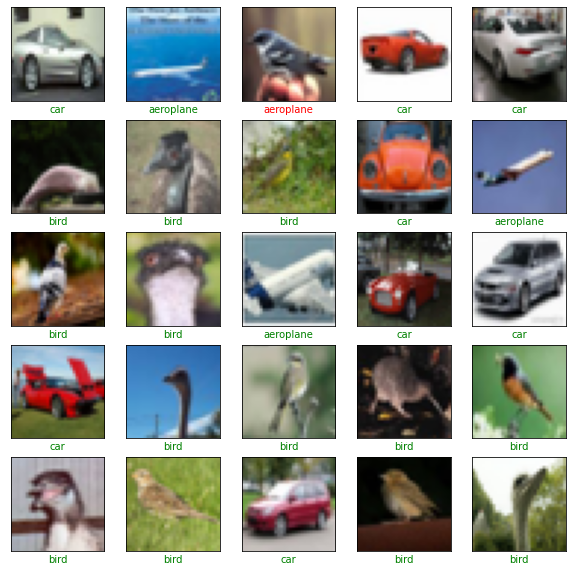

In [85]:
show_random_examples(x_test,y_test,predictions)

No handles with labels found to put in legend.


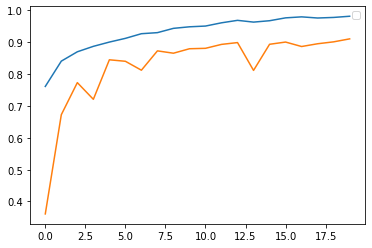

In [86]:
accuracy = h.history['accuracy']
val_acc = h.history["val_accuracy"]

plt.plot(range(len(accuracy)),accuracy)
plt.plot(range(len(accuracy)), val_acc)
plt.legend()
plt.show()